# Chapter 4 of the Machine Learning Journey

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import sklearn  
 

In [3]:
# Making some fake data to play around

X = 2 * np.random.rand(100, 1)
y = 4 + 3* X + np.random.randn(100, 1)

Text(0, 0.5, 'Y1')

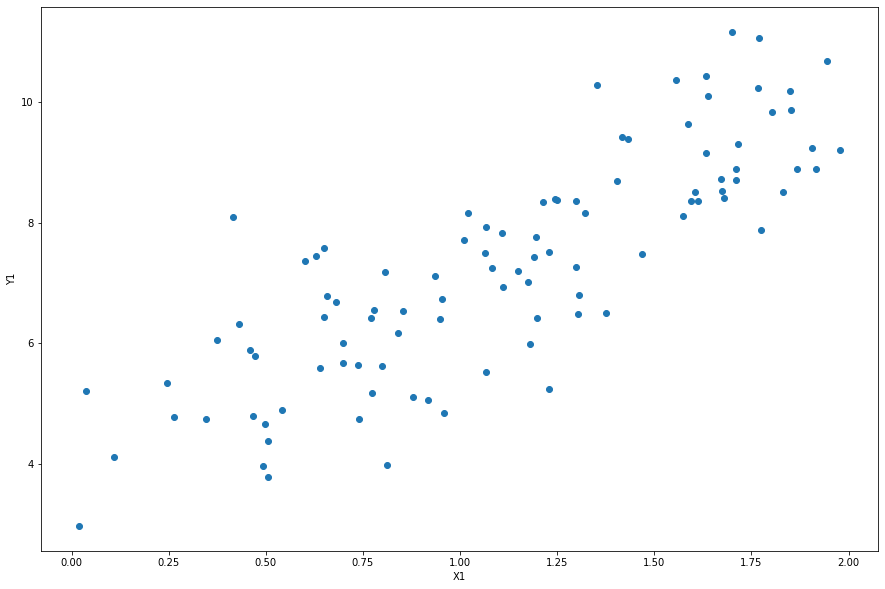

In [4]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(x=X, y=y)
ax.set_xlabel('X1')
ax.set_ylabel('Y1')

In [5]:
X_b = np.c_[np.ones((100,1)), X]
theta_b = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_b

array([[3.88341521],
       [3.0567826 ]])

### Comments

We were hoping for 4 +3X, but we got 4.13 and 2.89 +/- a little for when this is rerun. Theta_b was calculated using the moral equation that finds the best value of theta  
It is used to minimize a cost function to find the value of theta. 

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]


y_predict = X_new_b.dot(theta_b)
y_predict

array([[3.88341521],
       [9.99698042]])

(0.0, 2.0, 0.0, 15.0)

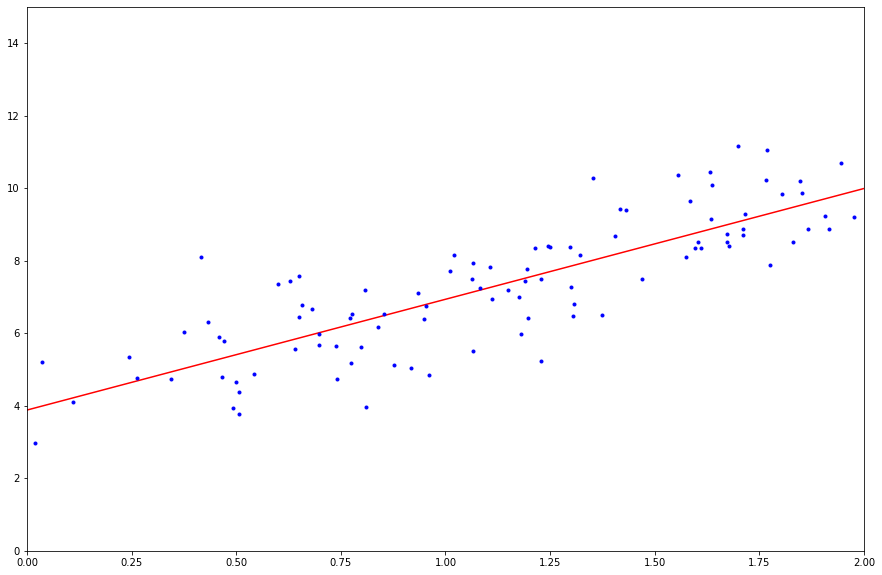

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))


ax.plot(X_new, y_predict, "r-", label='predictor')
ax.plot(X,y, "b.", label='data')

plt.axis([0, 2, 0, 15])


## Can do same thing with sklearn

In [8]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.88341521]), array([[3.0567826]]))

In [9]:
lin_reg.predict(X_new)

array([[3.88341521],
       [9.99698042]])

# A standard gradient descent algo

In [10]:


def gradient_descent(lr=0.1, n_iterations=1000, m=100, data=X_b, target=y):
    shape = X_b.shape
    print(shape)
    theta = np.random.randn(2, 1)

    for iter in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - target)
        theta = theta - lr * gradients
    return theta


In [11]:
gradient_descent()

(100, 2)


array([[3.88341521],
       [3.0567826 ]])

In [12]:

def learning_sched(t):
    t0 = 5
    t1 = 50
    return t0 / (t+t1)

def stochastic_gradient_descent(n_epochs=50, m=100, data=X_b, target=y):
    
    theta = np.random.randn(2, 1)
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = data[random_index:random_index+1]
            yi = target[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
            eta = learning_sched(epoch * m+1)
            theta = theta - eta * gradients
    return theta

In [13]:
stochastic_gradient_descent()

array([[3.83143037],
       [3.11074252]])

## Comments 


The normal equation can figure out optimal parameters to use, however its time complexity can be anywhere from n^2 to n^3. This is quite inefficient.  
Gradient descent can be better and there are different types.  
Batch Gradient Descent (Full basically) takes the entire training set calculates the partial derivative across all parameter values and calculates the cost function. 
One interesting thing is that some cost functions are harder to work with than others. The mean squared error one is a ocnvex function so it only has one global minimum, which means gradient descent will get there eventually.   

Stochastic gradient descent calculates descent based on one instance of the training data rather than the whole dataset. Since it is randomly selected and one training sample cannot be representative of the entire dataset, it is more "stochastic"

Mini-batch gradient descent is a sort of middle ground between the two instead of a full sample (batch) or one sample (stochastic) it uses a small random batch from the training set.  

As one would assume, batch is most accurate, but trains the longest, stochastic trains the fastest, but is less accurate and mini-batch is a common middle ground between the two.   


## Kinda wild, but true 

Suprisingly, you can fit a linear model to non linear data, all you have to do is square each feature and add it to the end of the feature vector you already have.  


In [14]:
## Making quadratic function data   

m = 100
X = 6 * np.random.rand(m, 1) - 3  
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [17]:
from sklearn.preprocessing import PolynomialFeatures  

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.34646814]
[-0.34646814  0.12004017]


In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
predictions = lin_reg.predict(X_poly)
print(f'Predictions: {predictions[1]}, Actual: {y[1]}')


Predictions: [1.53248982], Actual: [0.88103657]


Lin reg intercept: [1.93744372], lin reg coef: [[0.89983294 0.49740897]]


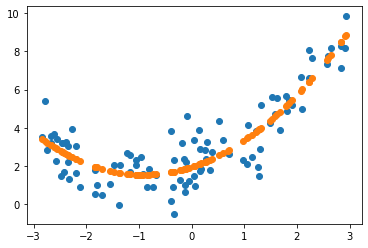

In [26]:
import matplotlib.pyplot as plt  
fig, ax = plt.subplots()

ax.scatter(X, y)
ax.scatter(X, predictions)
print(f'Lin reg intercept: {lin_reg.intercept_}, lin reg coef: {lin_reg.coef_}')

Predicted Function is: 
$$
y = 0.49x^2 + 0.83x + 1.93

$$

Which is close to what it actually is:

$$
y = 0.5x^2 + 1x + 2 + Gaussian Noise
$$


## Bias Variance Tradeoff

Bias happens when you do not give the model enough freedom. It underfits the data, because the model is to simple to understand the complexities. For example    
if you are training a linear model to try and predict a polynomial function.

Variance happens when you give the model to much freedom. The model will overfit the data, because the model has so much freedom it can fit itself to any instance of the data.    
For example if you are training a quadratic model on linear data.

Irreducible error is the noise in the data. You can lower this by lowering outliers and borken sensors etc.   

When you increase the complexity of a model you will increase its Variance but lower its bias. Conversely, if you decrease model complexity, you increase bias and lower variance. 


## Comments 

Interstingly enough the cost function used during training usually differs from the performance measure. Cost functions should be easily derivatable, while performance measures should be   
as close to the task needed to complete.

When using any of these regularized models (Ridge, lasso and elastic net) it is importnast to thandardize the data (StandardScaler)

## Ridge regression, Lasso regression and Elastic Net 


Ridge regression simply adds a regularization term to the cost function.    

$$
J(\theta) = MSE(\theta) + \alpha *\frac{1}{2} \sum_{i=1}^{n} \theta_i^2
$$

Increasing alpha leads to flatter prediction curves (less extreme and more reasonable). It basically automatically performs feature selection and sets higher degrees to zero

Lasso regression (least absolute shrinkage and selection operator regression) also adds a regularization term to the cost function, but it uses the $$ l_1$$ norm    
instead of half the square of the norm. 

$$
J(\theta) = MSE(\theta) + \alpha  \sum_{i=1}^{n} |\theta_i|
$$


ElasticNet is a mix between the both and the preffered method of linear regression. Basically all linear regression problems should be solved with a little     
regularization. Elastic net is preffered over Lasso because Lasso may behave eratically when the numbers of features is greater than the number of training instances   
or when several features are strongly correlated. Ridge is a good default, but if you suspect that only a few features are useful you should use ElasticNet.


Early stopping is another way to train your model and easy to implement. Just save the best model. if <val_score> < <current_score>: save the model and score

In [1]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet 

lasso_reg = Lasso(alpha=0.1)
ridge_reg = Ridge(alpha=0.1, solver='Cholesky')
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)



## Logistic Regression

Logistic regression is just like a linear regression model where it takes a weighted sum, however after this it applies a sigmoid function.  
It outputs a number between 0 and 1. Then rounds the number to a whole value 0 or 1 in some sort of chosen fashion. 